In [1]:
# Cleaning data into pandas dataframe format
import os
import pandas as pd
import numpy as np

# read test data from the csv files in the result data folder
# put the data into dataframe and filter out desired variables 
dfRaw = pd.DataFrame()

categories = ['flowers', 'houses', 'paints']

for category in categories:
    directory = category + "/data/"

    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                dfParticipant = pd.read_csv(directory + file)
                
                # add category column
                dfParticipant['category'] = category 
                # add image pair index
                if category == 'flowers':
                    dfParticipant['image_pair'] = np.arange(len(dfParticipant))
                elif category == 'houses':
                    dfParticipant['image_pair'] = np.arange(400, len(dfParticipant) + 400)
                else:
                    dfParticipant['image_pair'] = np.arange(800, len(dfParticipant) + 800)
                    
                dfRaw = dfRaw.append(dfParticipant)

# filter out useful information from raw data
df = dfRaw[['key_resp_2.keys', 
            'key_resp_2.rt', 
            'image_left', 
            'image_right', 
            'trial_num', 
            'participant', 
            'date',
            'category',
            'image_pair']]


/Users/loni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [ ]:
# save raw data into a csv file
df.to_csv("structured_data.csv")

In [2]:
df

,key_resp_2.keys,key_resp_2.rt,image_left,image_right,trial_num,participant,date,category,image_pair
0,z,5.310000,flowers/images/125.jpg,flowers/images/165.jpg,1,Ai,2020-11-21_22h07.13.545,flowers,0
1,m,4.539000,flowers/images/168.jpg,flowers/images/195.jpg,2,Ai,2020-11-21_22h07.13.545,flowers,1
2,z,1.846000,flowers/images/114.jpg,flowers/images/131.jpg,3,Ai,2020-11-21_22h07.13.545,flowers,2
3,z,1.767000,flowers/images/110.jpg,flowers/images/241.jpg,4,Ai,2020-11-21_22h07.13.545,flowers,3
4,z,2.042000,flowers/images/157.jpg,flowers/images/170.jpg,5,Ai,2020-11-21_22h07.13.545,flowers,4
...,...,...,...,...,...,...,...,...,...
406,z,3.173355,paints/images/236.jpg,paints/images/369.jpg,207,Anran Luo,2020-11-22_14h53.35.645,paints,1206
407,m,2.791595,paints/images/219.jpg,paints/images/136.jpg,208,Anran Luo,2020-11-22_14h53.35.645,paints,1207
408,m,0.991650,paints/images/306.jpg,paints/images/239.jpg,209,Anran Luo,2020-11-22_14h53.35.645,paints,1208
409,z,1.056805,paints/images/108.jpg,paints/images/259.jpg,210,Anran Luo,2020-11-22_14h53.35.645,paints,1209


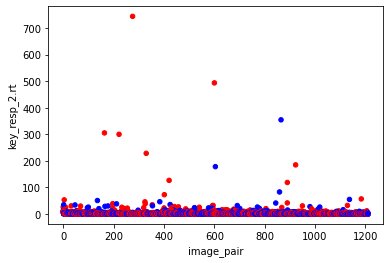

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assign color as left and right indicator
key = df['key_resp_2.keys']
color = key.replace(['z','m'], ['r','b'])

# assign marker as the category indicator
cat = df['category']
marker = cat.replace(['flowers', 'houses', 'paints'], ['^', 'o', 's'])

ax2 = df.plot.scatter(x='image_pair',
                      y='key_resp_2.rt',
                      c=color)

In [ ]:
# create score table for left image and right image, respectively
# the current score is calculated with basic average score of each
# image, more advanced math model can be applied to better differentiate 
# the performance of each image.
key = df['key_resp_2.keys']

leftScore = key.replace(['z','m'], [1,0])
rightScore = key.replace(['z','m'], [0,1])

# create image to score dataframe
imageDir = list(df['image_left']) + list(df['image_right'])
score = list(leftScore) + list(rightScore)
dfScore = pd.DataFrame({'imageDir':imageDir, 'score':score})
dfScore = dfScore.groupby('imageDir').mean()
dfScore.reset_index(inplace=True)
dfScore.to_csv("score.csv")

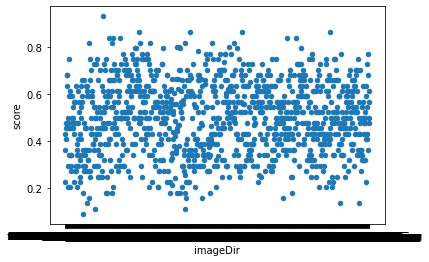

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax2 = dfScore.plot.scatter(x='imageDir',
                           y='score')

In [ ]:
# image resize for computation efficiency 
from PIL import Image
import os, sys

for category in categories:
    path = category + '/images/'
    
    # create a new folder for resized images
    newpath = category + '/images_resized/'
    os.makedirs(newpath)
    dirs = os.listdir(path)

    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(item)
            imResize = im.resize((100,100), Image.ANTIALIAS)
            imResize.save(newpath + '/' + f + '.jpg', 'JPEG', quality=90)

In [ ]:
# convert image to tricolor score array 
from PIL import Image
import numpy as np

def jpg_2_arr(file):
    img=Image.open(file)
    r,g,b=img.split()

    r_arr=np.array(r).reshape(650*500)
    g_arr=np.array(g).reshape(650*500)
    b_arr=np.array(b).reshape(650*500)

    img_arr=np.concatenate((r_arr,g_arr,b_arr))
    result=img_arr.reshape((3,650,500))
    return result

# demo image
jpg_2_arr('flowers/images/125.jpg')

array([[[29, 30, 31, ..., 41, 44, 47],
        [48, 49, 48, ..., 47, 47, 46],
        [45, 44, 43, ..., 35, 36, 36],
        ...,
        [73, 76, 78, ..., 62, 66, 67],
        [71, 76, 80, ..., 30, 30, 30],
        [30, 30, 29, ..., 64, 63, 60]],

       [[41, 42, 41, ..., 68, 71, 73],
        [74, 75, 76, ..., 51, 51, 51],
        [50, 49, 48, ..., 54, 55, 55],
        ...,
        [82, 85, 87, ..., 86, 86, 87],
        [89, 94, 95, ..., 57, 57, 57],
        [57, 57, 59, ..., 73, 72, 69]],

       [[ 5,  6,  6, ..., 33, 40, 44],
        [47, 50, 54, ..., 18, 18, 19],
        [18, 19, 18, ..., 22, 23, 23],
        ...,
        [27, 30, 30, ..., 60, 61, 62],
        [65, 70, 72, ..., 22, 22, 22],
        [22, 22, 25, ..., 16, 19, 16]]], dtype=uint8)